In [1]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib
import numpy as np
import os
%matplotlib inline

In [23]:
df = pd.read_csv('/Users/shayneufeld/Dropbox/insight/pricecamp/data/sales.csv',index_col=0)
df = df.drop_duplicates()
print('There are %.0f unique records in the database now' % df.shape[0])
print('Total revenue: %.02f' % df.amount_paid_usd.sum())

There are 92160 unique records in the database now
Total revenue: 695289.79


In [6]:
df.head(5)

,addl_count,album_title,amount_over_fmt,amount_paid,amount_paid_fmt,amount_paid_usd,art_id,art_url,artist_name,country,...,item_description,item_price,item_slug,item_type,package_image_id,releases,slug_type,track_album_slug_text,url,utc_date
0,NaN,S/T,NaN,7.0,$7,7.00,NaN,//f4.bcbits.com/img/0010845335_37.jpg,SIDDIQ,United States,...,LIMITED CASSETTE ACTION!,7.00,NaN,p,10845335.0,NaN,a,NaN,//illuminatedpaths.bandcamp.com/album/s-t-7,1.500604e+09
0,NaN,NaN,NaN,5.0,$5,5.00,1.960132e+09,//f4.bcbits.com/img/a1960131950_7.jpg,EGYPT,United States,...,ENDLESS FLIGHT,5.00,NaN,a,NaN,NaN,a,NaN,//egypt1.bandcamp.com/album/endless-flight,1.500604e+09
0,NaN,NaN,NaN,5.0,$5,5.00,2.794805e+09,//f4.bcbits.com/img/a2794804622_7.jpg,Whitebear,United States,...,MOR,5.00,NaN,a,NaN,NaN,a,NaN,//whitebearsounds.bandcamp.com/album/mor,1.500604e+09
0,NaN,NaN,NaN,10.0,$10,10.00,2.641811e+09,//f4.bcbits.com/img/a2641811294_7.jpg,Tiny Waves,United States,...,"Dank EP (Music from ""Donkey Kong"")",10.00,NaN,a,NaN,NaN,a,NaN,//tnywvs.bandcamp.com/album/dank-ep-music-from...,1.500604e+09
0,NaN,NaN,NaN,7.0,$7 CAD,5.57,2.060067e+09,//f4.bcbits.com/img/a2060066608_7.jpg,We Were Friends,Canada,...,Let Them Howl,5.99,NaN,a,NaN,NaN,a,NaN,//wewerefriends.bandcamp.com/album/let-them-howl,1.500604e+09


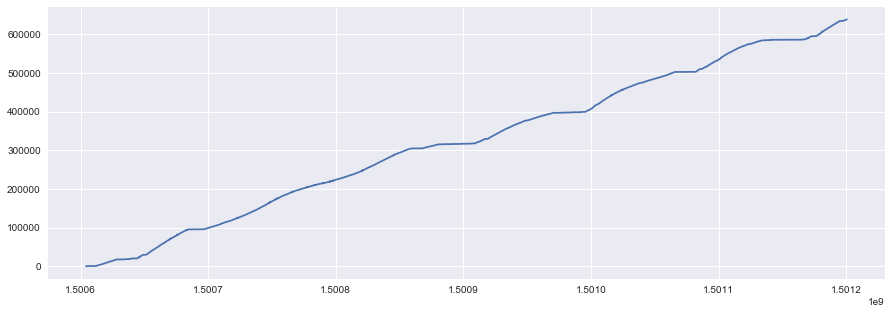

In [18]:
df.index = np.arange(df.shape[0])

plt.figure(figsize=(15,5))
plt.plot(df.utc_date.values, df.amount_paid_usd.cumsum().values)
#plt.xlim(1.5*700000e9,1.5*740000e9)

In [45]:
df.head(5)

,addl_count,album_title,amount_over_fmt,amount_paid,amount_paid_fmt,amount_paid_usd,art_id,art_url,artist_name,country,...,item_description,item_price,item_slug,item_type,package_image_id,releases,slug_type,track_album_slug_text,url,utc_date
0,NaN,S/T,NaN,7.0,$7,7.00,NaN,//f4.bcbits.com/img/0010845335_37.jpg,SIDDIQ,United States,...,LIMITED CASSETTE ACTION!,7.00,NaN,p,10845335.0,NaN,a,NaN,//illuminatedpaths.bandcamp.com/album/s-t-7,1.500604e+09
0,NaN,NaN,NaN,5.0,$5,5.00,1.960132e+09,//f4.bcbits.com/img/a1960131950_7.jpg,EGYPT,United States,...,ENDLESS FLIGHT,5.00,NaN,a,NaN,NaN,a,NaN,//egypt1.bandcamp.com/album/endless-flight,1.500604e+09
0,NaN,NaN,NaN,5.0,$5,5.00,2.794805e+09,//f4.bcbits.com/img/a2794804622_7.jpg,Whitebear,United States,...,MOR,5.00,NaN,a,NaN,NaN,a,NaN,//whitebearsounds.bandcamp.com/album/mor,1.500604e+09
0,NaN,NaN,NaN,10.0,$10,10.00,2.641811e+09,//f4.bcbits.com/img/a2641811294_7.jpg,Tiny Waves,United States,...,"Dank EP (Music from ""Donkey Kong"")",10.00,NaN,a,NaN,NaN,a,NaN,//tnywvs.bandcamp.com/album/dank-ep-music-from...,1.500604e+09
0,NaN,NaN,NaN,7.0,$7 CAD,5.57,2.060067e+09,//f4.bcbits.com/img/a2060066608_7.jpg,We Were Friends,Canada,...,Let Them Howl,5.99,NaN,a,NaN,NaN,a,NaN,//wewerefriends.bandcamp.com/album/let-them-howl,1.500604e+09


# Histogram of price per sale

(array([     0.,   2000.,   4000.,   6000.,   8000.,  10000.,  12000.]),
 <a list of 7 Text yticklabel objects>)

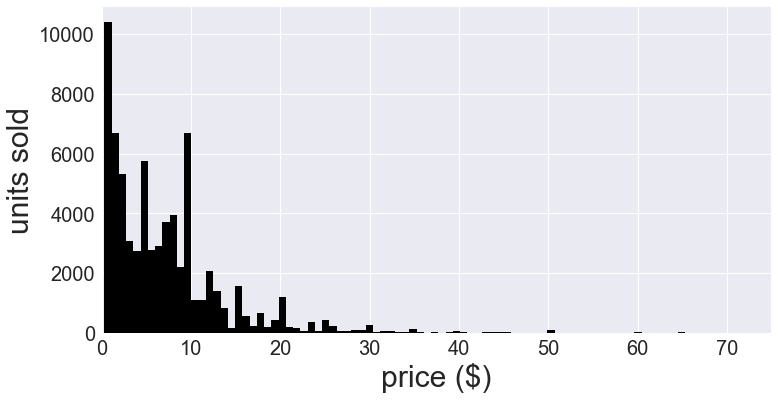

In [53]:
df = df.drop_duplicates()
plt.figure(figsize=(12,6))
paid_usd = df.amount_paid_usd.values
plt.hist(paid_usd,bins=500,color='black')
#plt.title('hist')
plt.xlim(0,75)
sns.despine()
plt.xlabel('price ($)',fontsize=30)
plt.ylabel('units sold',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Most popular albums (Top 25)

In [47]:
df.album_title.value_counts()[0:25]

DMVU - Bloccd - Limited White Vinyl w/ Truth remix (DDDX)     188
healing                                                       118
Jeff Rosenstock/SkaSucks Split 7"                              79
Herdersmat part 9-15 [MORDBOX002]                              67
wave 003                                                       55
Thank You For Being A Friend                                   48
魔術                                                             43
Magnatron 2.0                                                  43
Tchornobog                                                     42
Hallelujah Anyhow                                              39
Break of Dawn / Summertime Love 7"                             38
Real Numbers - Frank Infatuation b/w Leave It Behind           37
Fools Gold                                                     34
Akiha Den Den                                                  33
Wake Up And Fight                                              32
Alive     

# Most popular bands (Top 25)

In [14]:
counts = df.artist_name.value_counts()
counts[counts > 20].shape

(344,)

# Average sale price be category
still not sure what this means yet.

guesses:
- p: physical sale
- a: album download
- t: single download
- b: bundle sale

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

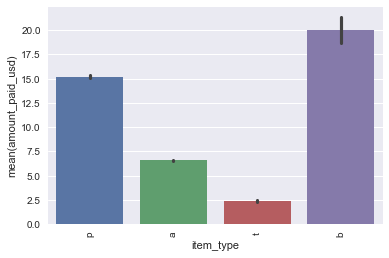

In [49]:
sns.barplot(x='item_type',y='amount_paid_usd',data=df)
plt.xticks(rotation='vertical')

New guess:
- p - physical album
- a - digital album
- t - song 
- b - bundle

# number of different albums sold:

In [50]:
df.head(100)

,addl_count,album_title,amount_over_fmt,amount_paid,amount_paid_fmt,amount_paid_usd,art_id,art_url,artist_name,country,...,item_description,item_price,item_slug,item_type,package_image_id,releases,slug_type,track_album_slug_text,url,utc_date
0,NaN,S/T,NaN,7.00,$7,7.00,NaN,//f4.bcbits.com/img/0010845335_37.jpg,SIDDIQ,United States,...,LIMITED CASSETTE ACTION!,7.00,NaN,p,10845335.0,NaN,a,NaN,//illuminatedpaths.bandcamp.com/album/s-t-7,1.500604e+09
0,NaN,NaN,NaN,5.00,$5,5.00,1.960132e+09,//f4.bcbits.com/img/a1960131950_7.jpg,EGYPT,United States,...,ENDLESS FLIGHT,5.00,NaN,a,NaN,NaN,a,NaN,//egypt1.bandcamp.com/album/endless-flight,1.500604e+09
0,NaN,NaN,NaN,5.00,$5,5.00,2.794805e+09,//f4.bcbits.com/img/a2794804622_7.jpg,Whitebear,United States,...,MOR,5.00,NaN,a,NaN,NaN,a,NaN,//whitebearsounds.bandcamp.com/album/mor,1.500604e+09
0,NaN,NaN,NaN,10.00,$10,10.00,2.641811e+09,//f4.bcbits.com/img/a2641811294_7.jpg,Tiny Waves,United States,...,"Dank EP (Music from ""Donkey Kong"")",10.00,NaN,a,NaN,NaN,a,NaN,//tnywvs.bandcamp.com/album/dank-ep-music-from...,1.500604e+09
0,NaN,NaN,NaN,7.00,$7 CAD,5.57,2.060067e+09,//f4.bcbits.com/img/a2060066608_7.jpg,We Were Friends,Canada,...,Let Them Howl,5.99,NaN,a,NaN,NaN,a,NaN,//wewerefriends.bandcamp.com/album/let-them-howl,1.500604e+09
0,NaN,NaN,NaN,5.00,$5,5.00,2.888681e+09,//f4.bcbits.com/img/a2888681000_7.jpg,Algernon Cadwallader,United States,...,Parrot Flies,5.00,NaN,a,NaN,NaN,a,NaN,//algernoncadwallader.bandcamp.com/album/parro...,1.500604e+09
0,NaN,NaN,$5,5.00,$5,5.00,6.144306e+08,//f4.bcbits.com/img/a0614430585_7.jpg,CJ&S,United States,...,CJ&S,0.00,NaN,a,NaN,NaN,a,NaN,//cjands.bandcamp.com/album/cj-s,1.500604e+09
0,NaN,NaN,£2,2.00,£2,2.59,2.391347e+09,//f4.bcbits.com/img/a2391347003_7.jpg,Ghost Harmonics,United States,...,A Hidden Beauty,0.00,NaN,a,NaN,NaN,a,NaN,//ghostharmonics.bandcamp.com/album/a-hidden-b...,1.500604e+09
0,NaN,NaN,£1.01,6.00,£6,7.78,3.814077e+08,//f4.bcbits.com/img/a0381407704_7.jpg,Joe King,Malaysia,...,Longing,4.99,NaN,a,NaN,NaN,a,NaN,//joekinguk.bandcamp.com/album/longing,1.500604e+09
0,NaN,NaN,$5,12.00,$12,12.00,1.141700e+09,//f4.bcbits.com/img/a1141700252_7.jpg,Garoad,United States,...,VA-11 HALL-A - Second Round,7.00,NaN,a,NaN,NaN,a,NaN,//garoad.bandcamp.com/album/va-11-hall-a-secon...,1.500604e+09


# LOOP THROUGH BANDCAMP SPIDER

In [4]:
album_counts = pd.read_csv('/Users/shayneufeld/Dropbox/insight/pricecamp/album_counts.csv')
urls_sorted = album_counts.url.values
urls_sorted[:10]

array(['http://music.soundoftheaviators.com/track/fading-light',
       '//markovsoroka.bandcamp.com/album/tchornobog',
       '//deepdarkdangerous.bandcamp.com/album/dmvu-bloccd-limited-white-vinyl-w-truth-remix-dddx',
       '//mikelikesrap.bandcamp.com/album/may-god-bless-your-hustle',
       '//ztapes.bandcamp.com/album/healing',
       '//sinmara.bandcamp.com/album/within-the-weaves-of-infinity',
       'http://music.dandywarhols.com/album/live-sonic-disruption',
       'http://music.cynthialin.com/album/ukulele-days',
       '//fearofdark.bandcamp.com/album/exit-plan',
       '//berriedalive.bandcamp.com/merch/fools-gold-physical-copy'], dtype=object)

In [5]:
urls_scraped_df = pd.read_csv('/Users/shayneufeld/Dropbox/insight/pricecamp/data/urls_scraped.csv')
urls_scraped = urls_scraped_df.url.values

In [6]:
cd '/Users/shayneufeld/Dropbox/insight/pricecamp/bandcamp_spider'

/Users/shayneufeld/Dropbox/insight/pricecamp/bandcamp_spider


In [7]:
pwd

'/Users/shayneufeld/Dropbox/insight/pricecamp/bandcamp_spider'

In [ ]:
for url in urls_sorted:
    
    if url not in urls_scraped:
        '''
        get input parameters
        '''
        if url[0] == 'h':
            album_url = url
        elif url[0] == '/':
            album_url = 'https:' + url
        else:
            print('URL BROKEN')
            #break
        artist_name = df[df.url==url].head(1).artist_name.values

        al_start = url.find('album')
            
        if al_start == -1:
            al_start = url.find('track')
        if al_start == -1:
            print(url)
        album_name = url[al_start+6:]
        '''
        run bandcamp spider
        '''
        os.system("scrapy crawl bandcamp -a start_domain='%s' -a album_name='%s' -a artist_name='%s'" % (album_url,album_name,artist_name))
        #scrapy crawl bandcamp -a start_domain='https://andreabaroni.bandcamp.com/album/broken-space-ost' -a album_name='Broken Spaces' -a artist_name='Andrea Baroni'
        urls_scraped = np.append(urls_scraped,url)
        print('%s SCRAPED' % album_url)
    #else:
        #print('%s already scraped' % album_url)

https://markovsoroka.bandcamp.com/album/tchornobog SCRAPED
https://deepdarkdangerous.bandcamp.com/album/dmvu-bloccd-limited-white-vinyl-w-truth-remix-dddx SCRAPED
https://mikelikesrap.bandcamp.com/album/may-god-bless-your-hustle SCRAPED
https://ztapes.bandcamp.com/album/healing SCRAPED
https://sinmara.bandcamp.com/album/within-the-weaves-of-infinity SCRAPED
https://fearofdark.bandcamp.com/album/exit-plan SCRAPED
//berriedalive.bandcamp.com/merch/fools-gold-physical-copy
https://berriedalive.bandcamp.com/merch/fools-gold-physical-copy SCRAPED
https://stellardrone.bandcamp.com/album/between-the-rings SCRAPED
https://skasucks.bandcamp.com/album/jeff-rosenstock-skasucks-split-7 SCRAPED
https://magic-sword.bandcamp.com/album/volume-1 SCRAPED
https://midwestcollective.bandcamp.com/album/odyssey SCRAPED
https://newretrowave.bandcamp.com/album/magnatron-20 SCRAPED
//circuit3.bandcamp.com/merch/all-i-ever-knew-numbered-limited-edition-cd-in-metal-tin-package
https://circuit3.bandcamp.com/merch/

https://nightvale.bandcamp.com/album/ghost-stories-live SCRAPED
https://aveytare.bandcamp.com/album/eucalyptus SCRAPED
https://tricky.bandcamp.com/album/ununiform SCRAPED
https://c418.bandcamp.com/track/stranger-think SCRAPED
https://flagland.bandcamp.com/album/two-brothers-and-a-ghost SCRAPED
https://boyharsher.bandcamp.com/album/country-girl-ep SCRAPED
https://onethousandhours.bandcamp.com/album/sleep SCRAPED
https://perturbator.bandcamp.com/album/dangerous-days SCRAPED
https://darrenhayman.bandcamp.com/album/the-hayman-kupa-band SCRAPED
https://slowdive.bandcamp.com/album/slowdive SCRAPED
https://sydarthur.bandcamp.com/album/on-an-on SCRAPED
//ztapes.bandcamp.com
https://ztapes.bandcamp.com SCRAPED
https://8bitweapon.bandcamp.com/album/class-apples SCRAPED
https://cryochamber.bandcamp.com/album/be-left-to-oneself SCRAPED
https://chillhop.bandcamp.com/album/chillhop-essentials-summer-2017 SCRAPED
https://karengwyer.bandcamp.com/album/rembo SCRAPED
https://lycandesebeats.bandcamp.com/

https://alfamist.bandcamp.com/album/antiphon SCRAPED
//blueswanrecords.bandcamp.com/merch/blue-swan-records-shirt
https://blueswanrecords.bandcamp.com/merch/blue-swan-records-shirt SCRAPED
https://iomusicofficial.bandcamp.com/album/anyone-anywhere SCRAPED
https://dafunkylooper.bandcamp.com/album/boom-bap-language SCRAPED
https://timeslaves.bandcamp.com/album/rise-of-the-machines SCRAPED
https://eighthtowerrecords.bandcamp.com/album/hidden-universe SCRAPED
//michellezauner.bandcamp.com/merch/diving-woman-shirt
https://michellezauner.bandcamp.com/merch/diving-woman-shirt SCRAPED
https://theartisanera.bandcamp.com/album/adversary-omnipotent SCRAPED
https://dame-boston.bandcamp.com/album/dame-s-t-ep SCRAPED
//berriedalive.bandcamp.com/merch/fools-gold-signed-instrumental-physical-copy-limited
https://berriedalive.bandcamp.com/merch/fools-gold-signed-instrumental-physical-copy-limited SCRAPED
https://sonicgroove.bandcamp.com/album/realism-sg-1778 SCRAPED
https://shakeygraves.bandcamp.com/al

In [51]:
album_url

'https://semanticarecords.bandcamp.com/album/volumi-dinamici-semantica-87cd'

In [27]:
album_url

'https://blood-music.bandcamp.com/album/the-wrath-of-code'

# fix the album name problem

In [57]:
folder =  '/Users/shayneufeld/Dropbox/insight/pricecamp/data/albums'

In [74]:
urls_scraped = []

files = os.listdir(folder)

for i,file in enumerate(files):
    if not file[0] == '.':
        df = pd.read_csv(file)
        try:
            url = df.album_url.values[0]
            al_start = url.find('album')
            if al_start == -1:
                al_start = url.find('track')
            if al_start == -1:
                print(url)
            album_name = url[al_start+6:]
            df.album_name = album_name
            file_name = '/Users/shayneufeld/dropbox/insight/pricecamp/data/albums_fixed/%s-%s.csv' %(album_name,df.artist_name.values[0])
            file_name = file_name.replace(',','')
            file_name = file_name.replace(' ','')
            df.to_csv(file_name)
            urls_scraped.append(url)
        except:
            print(file)
            pass

ciggy-tee-Midi보이즈.csv
devil-hand-2-pins-Toke.csv
diving-woman-shirt-Japanese Breakfast.csv
fools-gold-physical-copy-Berried Alive.csv
fools-gold-signed-instrumental-physical-copy-limited-Berried Alive.csv
liluglymane.bandcamp.com-LIL UGLY MANE.csv
https://masterbootrecord.bandcamp.com
masterbootrecord.bandcamp.com-MASTER BOOT RECORD.csv
music.businesscasual.biz-business casual.csv
mutant-city-acid-4-12-vinyl-Balkan Recordings.csv
or-summer-bundle-2017-Occult Research.csv
original-ozma-reissue-design-yellow-on-red-Ozma.csv
popskyy.bandcamp.com-Popskyy.csv
quality-time-with-kobe-The Treetops.csv
roman-empire-pin-Der Blutharsch and the infinite church of the leading hand.csv
sugar-skull-for-tour-shirt-Brown Bird.csv
the-ghost-of-buck-hill-Liam Lloyd.csv
thomas-the-wank-engine-t-shirt-Footprints In The Custard.csv
unofficial-edits-and-overdubs-part-3-2-12-clear-vinyl-new-release-Atypical-dopeness.csv
unwavering-faith-bundle-cd-t-shirt-handmade-necklace-Sleep Token.csv
worth-it-Mike Lee.

In [36]:
file

'10-games-to-play-before-you-die-FilthyCasualswithTommyDassaloBenVernelandAdamKnox.csv'

In [38]:
os.path.join()

AttributeError: module 'os' has no attribute 'join'

In [9]:
urls_scraped = []
folder =  '/Users/shayneufeld/Dropbox/insight/pricecamp/data/albums_fixed/'
files = os.listdir(folder)

for i,file in enumerate(files):
    try:
        if not file[0] == '.':
            df = pd.read_csv(os.path.join(folder,file))
            url = df.album_url.values[0]
            urls_scraped.append(url)
    except:
        print(file)
        pass

die-alone-[Psychobabylon].csv
ired.bandcamp.com-[Desired].csv
sangbeats.bandcamp.com-[jinsang].csv
skyy.bandcamp.com-[Popskyy].csv
the-desert-suite-[Ben.csv


In [1]:
urls_scraped

NameError: name 'urls_scraped' is not defined

In [10]:
d = {'url':urls_scraped}
urls_scraped_df = pd.DataFrame(data = d)
urls_scraped_df.to_csv('/Users/shayneufeld/Dropbox/insight/pricecamp/data/urls_scraped.csv')

,url
0,https://filthycasualspod.bandcamp.com/album/10...
1,https://occultresearch.bandcamp.com/album/33
2,https://36questions.bandcamp.com/album/36-ques...
3,https://alightinthedark.bandcamp.com/album/a-l...
4,https://dark-horse.bandcamp.com/album/bomb-thr...
